In [1]:
#import libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
#prepare data
data = pd.read_csv('spam.csv',encoding='latin-1')

data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":'label', "v2":'text'})
#print(data.head())
tags = data["label"]
texts = data["text"]

In [3]:
#classify label (0 and 1)
data['label'].unique()
label = {'spam': 1,'ham': 0}
data['label'].replace(label, inplace=True)

In [4]:
#separate tags and texts into training and test sets
training_size = int(len(texts) * 0.8)

training_texts = texts[0:training_size]
testing_texts = texts[training_size:]
training_tags = tags[0:training_size]
testing_tags = tags[training_size:]

training_tags_final = np.array(training_tags)
testing_tags_final = np.array(testing_tags)

In [5]:
#tokenize dataset 
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_texts)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_texts)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_texts)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

In [6]:
#modelling
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           16000     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 6)                 9606      
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25,613
Trainable params: 25,613
Non-trainable params: 0
_________________________________________________________________


In [7]:
num_epochs = 20
history=model.fit(padded, training_tags_final, epochs=num_epochs, validation_data=(testing_padded, testing_tags_final))


Epoch 1/20
140/140 [==============================] - 6s 34ms/step - loss: 0.3795 - accuracy: 0.8629 - val_loss: 0.2135 - val_accuracy: 0.8691
Epoch 2/20
140/140 [==============================] - 5s 34ms/step - loss: 0.1808 - accuracy: 0.8800 - val_loss: 0.1506 - val_accuracy: 0.9659
Epoch 3/20
140/140 [==============================] - 4s 28ms/step - loss: 0.1437 - accuracy: 0.9713 - val_loss: 0.1331 - val_accuracy: 0.9794
Epoch 4/20
140/140 [==============================] - 4s 31ms/step - loss: 0.1201 - accuracy: 0.9803 - val_loss: 0.0786 - val_accuracy: 0.9812
Epoch 5/20
140/140 [==============================] - 5s 36ms/step - loss: 0.0430 - accuracy: 0.9872 - val_loss: 0.0503 - val_accuracy: 0.9848
Epoch 6/20
140/140 [==============================] - 4s 30ms/step - loss: 0.0299 - accuracy: 0.9901 - val_loss: 0.0490 - val_accuracy: 0.9839
Epoch 7/20
140/140 [==============================] - 4s 31ms/step - loss: 0.0233 - accuracy: 0.9930 - val_loss: 0.0475 - val_accuracy: 0.9821

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


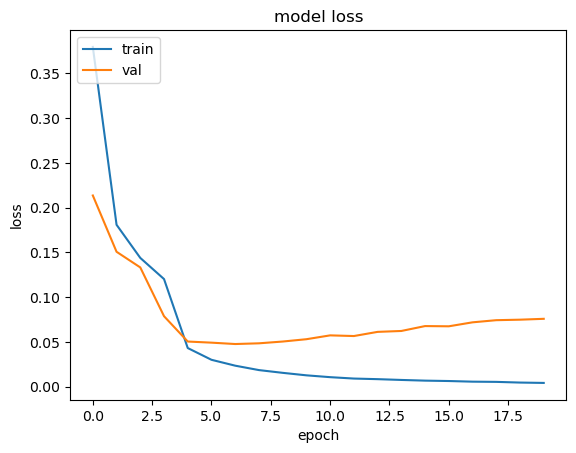

In [8]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
data = pd.read_csv('output_spam.csv',encoding='latin-1')

data = data.rename(columns={"ï»¿":'labels', "text":'texts'})
data.head()

,labels,texts
0,1,Feel Yourself That You Are Always Happy.. Slow...
1,2,staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
2,3,Send me yetty's number pls.
3,4,Hey so this sat are we going for the intro pil...
4,5,I got it before the new year cos yetunde said ...


In [19]:
messages = data['texts'].astype(str)
print(messages)

#creating the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(messages)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

classes = model.predict(fakes_padded)

#the closer the class is to 1, the more likely that the message is spam
for x in range(len(messages)):
  print(messages[x])
  print(classes[x])
  print('\n')

0     Feel Yourself That You Are Always Happy.. Slow...
1     staff.science.nus.edu.sg/~phyhcmk/teaching/pc1323
2                           Send me yetty's number pls.
3     Hey so this sat are we going for the intro pil...
4     I got it before the new year cos yetunde said ...
5     Hey we can go jazz power yoga hip hop kb and y...
6     Hey mate. Spoke to the mag people. Weâ°ÃÃ·re...
7                                Morning only i can ok.
8                                  Wat time Ã_ finish?
9                 Shant disturb u anymore... Jia you...
10    4mths half price Orange line rental & latest c...
11    Your opinion about me? 1. Over 2. Jada 3. Kusr...
12    MOON has come to color your dreams, STARS to m...
13    You are a winner U have been specially selecte...
14    Unless it's a situation where YOU GO GURL woul...
15    Awww dat is sweet! We can think of something t...
16                              Bring tat cd don forget
17    Single line with a big meaning::::: \Miss 